In [1]:
%%capture
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import seaborn as sns
import nltk 
from nltk import RegexpTokenizer as rpt
from nltk.corpus import stopwords as sw
from string import punctuation 

nltk.download('punkt')
nltk.download('stopwords')
stopwords = sw.words('portuguese')

data_url="https://raw.githubusercontent.com/liraop/recinfo_lab2/master/data/results.csv"
dados = pd.read_csv(data_url).replace(np.nan, '', regex=True)
documents = dados.text.count()
itens = []

### 1. Escolha uma estratégia de tokenização para a coleção que você está usando e justifique sua estratégia. É importante que você inclua decisões adicionais em relação ao que foi feito no Laboratório anterior (por exemplo, tratamento de maiúsculas/minúsculas e strings numéricas).

#### No lab anterior foi escolhida uma estratégia simples. Foram separadas as palavras consideradas úteis com uso da expressão regular `\w+`, colocando as palavras todas em caixa-baixa, sendo filtradas pelas condições de não serem *stopwords*, nem conunto de digitos numéricos, além de bigramas. Desta forma se anula boa parte do erro gerado por palavras não adequadas para análise. Contudo, ainda assim há perda de dados que seriam úteis para a análise.

#### Neste lab, será utilizado o módulo de *stemming* para português incluída na biblioteca NLTK, bem como os módulos de *stopwords* e *tokenizer*. Na tokenização desta vez consideraremos datas no formato `aaaa` e também entre maiúsculas e minúsculas, adicionando mais complexidade na análise. Primeiro faremos a tokenização mais geral, separando as palavras, depois será feita a tokenização das datas.

In [2]:
word_token = rpt(r'\w+')
year_token = rpt(r'\d{4}')

def tokenize_it(dataset, pattern, words):
    for entry in dataset.text:
        tokens = []
        for token in pattern.tokenize(entry):
            if token not in stopwords and len(token) > 3:
                tokens.append(token)
        words.extend(tokens)

#### O método `tokenize_it` faz a aplicação dos *patterns* definidos, de modo que nosso conjunto de palavras seja incrementado de acordo com o processo de tokenização. 

#### A variável `word_token` utiliza a mesma regex do outro lab. Contudo, dentro do método, não é feita nenhuma modificação no texto analizado. Desta forma, tanto palavras com maiúsculas e minúsculas são adicionadas ao vocábulo. 

### 2. Refaça a questão 2 do Laboratório anterior usando os tokens produzidos.

In [3]:
tokenize_it(dados, word_token, itens)
tokenize_it(dados, year_token, itens)

df = pd.DataFrame(itens, columns=['palavra'])
itens_df = df.palavra.value_counts().reset_index()
itens_df.columns = ['palavra', 'frequencia']
itens_df['r'] = itens_df.frequencia.rank(ascending=False, method='first')

total_itens = len(itens)
vocabulary = set(itens)

itens_df["PR"] = round((itens_df.frequencia / total_itens) * 100, 2)
itens_df["r.PR"] = round(itens_df.r * itens_df["PR"] / 100, 3)
itens_df[:50]

,palavra,frequencia,r,PR,r.PR
0,anos,583,1.0,0.51,0.005
1,sobre,416,2.0,0.36,0.007
2,presidente,412,3.0,0.36,0.011
3,Bolsonaro,376,4.0,0.33,0.013
4,Brasil,333,5.0,0.29,0.014
5,país,289,6.0,0.25,0.015
6,ainda,289,7.0,0.25,0.018
7,Governo,280,8.0,0.24,0.019
8,contra,238,9.0,0.21,0.019
9,pessoas,235,10.0,0.21,0.021


### 3. Aplique Stemming nos tokens produzidos e encontre 10 exemplos de falsos positivos e 10 exemplos de falsos negativos. Que impacto você acha que falsos positivos e negativos, como esses, teriam no processamento de consultas? Dê exemplos. 

In [4]:
nltk.download('rslp')
from nltk.stem import RSLPStemmer as stemmer

stemmed_set = []

def stemm_it(word_set, result_set):
    stm = stemmer()
    stm_word = []
    for word in word_set:
        stm_word.append(stm.stem(word))
    result_set.extend(stm_word)
        
stemm_it(vocabulary, stemmed_set)

df = pd.DataFrame(stemmed_set, columns=['radical'])
after_stem = df.radical.value_counts().reset_index()
after_stem.columns = ['radical', 'frequencia']
after_stem['r'] = after_stem.frequencia.rank(ascending=False, method='first')

#### Utilizamos o `vocabulary`, visto que iremos utilizar os radicais das palavras, não precisando assim, manter a estrutura textual do dataframe inicial. Desta forma, vemos na tabela abaixo a frequência dos radicais. 

In [5]:
after_stem[:50]

,radical,frequencia,r
0,pass,39,1.0
1,trabalh,34,2.0
2,cont,33,3.0
3,sent,33,4.0
4,est,32,5.0
5,pens,30,6.0
6,volt,29,7.0
7,cri,28,8.0
8,dev,27,9.0
9,viv,26,10.0


```Overstemming é um erro em que duas palavras separadas são derivadas para a mesma raiz, mas não deveriam ter sido - um falso positivo . Understemming é um erro em que duas palavras separadas flexionadas devem ser derivadas para a mesma raiz, mas não são - um falso negativo. ```
http://unasapientia.blogspot.com/2018/06/stemming.html

### Explorando o conjunto ` stemmed_set` além do top 50 mostrado acima, Podemos encontrar:

### Falsos positivos (*overstemming*):
#### país - paisagem, paises; 
#### nest - neste, nestlé; 
#### dur - durante, dura; 
#### real - realeza, realidade;  
#### precis - precisamente, precisar;
#### milit - militar, militante;
#### form - formação, formato;
#### dur - duração, dura
#### part - participação, partido
#### comed - comediante, comedido

### Falsos negativos (*understemming*): 
#### acidental/acidente - acid/acident; 
#### acusatório/acusado - acus/acusató; 
#### brilhante/brilho - brilh/brilhant; 
#### censor/censura - cens/censur 
#### certificado/certificou - certific/certif
#### cibernético/ciberataque/cibersegurança - cibernét/ciberataq/ciberseguranç
#### clima/climático - clim/climá
#### coincidências - coincid/coincidências
#### colaborador/colaboração - colab/colabor

#### Estes enganos podem facilmente gerar ruído na análise pois quebraríamos o sentido do texto, pois geraríamos um texto "radicado" com sentido dúbio, aumentando a quantidade de dados obtidos sem confiança.


### 4. Refaça a questão 3 do Laboratório anterior usando os tokens stemizados. Você percebeu alguma diferença em relação aos tokens sem stemming? Se sim, quais?

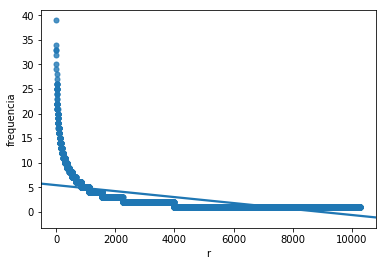

In [6]:
function, axis = plt.subplots()
sns.regplot("r", "frequencia", after_stem, ax=axis, marker=".", scatter_kws={"s": 100})

#### Em comparação ao plot do lab02 é possível ver que com os tokens stemizados a quantidade de itens no conjunto praticamente cai pela metade e a frequência tem uma queda vertiginosa. Isto faz sentido pois, como cortamos as palavras para o uso de radicais (raízes),  reduzimos o nosso vocábulo apenas para eles, excluíndo variações que fazem grande diferença na quantidade de palavras. Por outro lado, na frequência, vemos que os dados são plotados de forma bem mais coesa e uniforme, sem grandes variações, o que implica que temos uma massa de dados mais uniforme. Os dados não fogem muito do modelo, contudo, vemos que muitas raízes, a maior parte, se repete poucas vezes. Algo similar ao do lab02.